This part has (regionwise and complete, 5 models each):
1. SVRegressor
2. Lasso Regression - to find the important features, and linear regression using only these important features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.describe()

Apr-18       May-18       Jun-18       Jul-18       Aug-18  \
count   1039.000000  1039.000000  1039.000000  1039.000000  1039.000000   
mean     248.102984   216.824832   209.153994   157.714148   174.883542   
std      785.750982   493.283000   480.078224   351.488015   450.706178   
min        1.000000     1.000000     1.000000     1.000000     1.000000   
25%        9.000000     9.500000    10.000000    10.000000     9.000000   
50%       18.000000    19.000000    19.000000    18.000000    19.000000   
75%      191.000000   186.500000   192.500000   137.000000   128.000000   
max    17540.000000  5029.000000  5823.000000  3151.000000  6700.000000   

            Sep-18       Oct-18        Nov-18        Dec-18        Jan-19  \
count  1039.000000  1039.000000   1039.000000   1039.000000   1039.000000   
mean    158.524543   161.719923    201.784408    212.032724    177.205967   
std     374.631088   376.697992    614.940984    766.657455    790.932939   
min       1.000000     1.000000      1.000000      1.000000      1.000000   
25%      10.000000     9.000000     10.000000     10.000000     10.000000   
50%      19.000000    19.000000     19.000000     19.000000     20.000000   
75%     140.000000   127.500000    143.500000    170.000000    130.500000   
max    4604.000000  3576.000000  10322.000000  18336.000000  19324.000000   

       ...       Aug-20       Sep-20       Oct-20        Nov-20        Dec-20  \
count  ...  1039.000000  1039.000000  1039.000000   1039.000000   1039.000000   
mean   ...   213.336862   207.782483   238.777671    258.241578    388.457170   
std    ...   498.147866   495.033144   552.393333    950.188944   1374.171617   
min    ...     1.000000     1.000000     1.000000      1.000000      1.000000   
25%    ...    17.000000    16.000000    19.000000     18.500000     30.500000   
50%    ...    63.000000    60.000000    73.000000     67.000000    106.000000   
75%    ...   186.000000   181.500000   215.000000    198.000000    297.500000   
max    ...  6283.000000  6097.000000  7469.000000  18148.000000  30996.000000   

             Jan-21        Feb-21        Mar-21       Apr-21       May-21  
count   1039.000000   1039.000000   1039.000000  1039.000000  1039.000000  
mean     274.597690    275.120308    387.707411   150.856593   122.123195  
std      805.756394    699.096181   1106.507945   420.741507   329.277995  
min        1.000000      1.000000      1.000000     1.000000     1.000000  
25%       22.500000     32.000000     43.000000    18.000000    14.000000  
50%       77.000000    105.000000    129.000000    46.000000    33.000000  
75%      218.500000    254.000000    339.500000   133.000000    92.000000  
max    12020.000000  11641.000000  16483.000000  9199.000000  4669.000000  

[8 rows x 38 columns]

In [ ]:
west = df.loc[df['Region'] == "WEST"]
west = west.drop(['Warehouse id', 'Region', 'SKU id'], axis = 1)
west

Apr-18  May-18  Jun-18  Jul-18  Aug-18  Sep-18  Oct-18  Nov-18  Dec-18  \
445      90      69      48      33      18      51     105      42      30   
446     127      71      11      31      63      43     175      51     247   
447      20      23      29      23      41      20      20      20      20   
448      36      31      37      28      29      43      54      27      17   
449     105      21      45      42      12      30      18      21       6   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
748       9       9       9       9       9       9       9       9       9   
749      90     256     106      62      78      90      98     142     118   
750      66     150     186      30      42      90      69      96      69   
751      17      23      11      17      11      53      23      41      17   
752      76      28      20      28      20      44     116     100      88   

     Jan-19  ...  Aug-20  Sep-20  Oct-20  Nov-20  Dec-20  Jan-21  Feb-21  \
445      54  ...     105      99     126     141     138      24     288   
446      27  ...      55     315     211     143      95      43     115   
447      20  ...      20      20      29      26      32      20      26   
448      31  ...      62      50      80      82      83      92      95   
449      96  ...     177     204     252     150      78     492     303   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
748       9  ...       9       9       9       9       9      41       9   
749      78  ...      14      22      62      22      64     174     190   
750      12  ...       6       6      36      24      54      96     120   
751      29  ...      11      11      71      35      59      77      29   
752     244  ...      20      20      20      20      20     164     124   

     Mar-21  Apr-21  May-21  
445     135      87     117  
446     171     103     155  
447      23      59      20  
448     134      93      21  
449     117     210     234  
..      ...     ...     ...  
748       9       9       9  
749     194      26      62  
750     138      12      30  
751      23      11      71  
752      52      28      36  

[308 rows x 38 columns]

In [ ]:
north = df.loc[df['Region'] == "NORTH"]
north = north.drop(['Warehouse id', 'Region', 'SKU id'], axis = 1)

In [ ]:
south = df.loc[df['Region'] == "SOUTH"]
south = south.drop(['Warehouse id', 'Region', 'SKU id'], axis = 1)

In [ ]:
east = df.loc[df['Region'] == "EAST"]
east = east.drop(['Warehouse id', 'Region', 'SKU id'], axis = 1)

West Region

In [ ]:
x = west.drop(["May-21"], axis = 1)
x

Apr-18  May-18  Jun-18  Jul-18  Aug-18  Sep-18  Oct-18  Nov-18  Dec-18  \
445      90      69      48      33      18      51     105      42      30   
446     127      71      11      31      63      43     175      51     247   
447      20      23      29      23      41      20      20      20      20   
448      36      31      37      28      29      43      54      27      17   
449     105      21      45      42      12      30      18      21       6   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
748       9       9       9       9       9       9       9       9       9   
749      90     256     106      62      78      90      98     142     118   
750      66     150     186      30      42      90      69      96      69   
751      17      23      11      17      11      53      23      41      17   
752      76      28      20      28      20      44     116     100      88   

     Jan-19  ...  Jul-20  Aug-20  Sep-20  Oct-20  Nov-20  Dec-20  Jan-21  \
445      54  ...      66     105      99     126     141     138      24   
446      27  ...      87      55     315     211     143      95      43   
447      20  ...      20      20      20      29      26      32      20   
448      31  ...     165      62      50      80      82      83      92   
449      96  ...     219     177     204     252     150      78     492   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
748       9  ...       9       9       9       9       9       9      41   
749      78  ...      14      14      22      62      22      64     174   
750      12  ...       6       6       6      36      24      54      96   
751      29  ...      11      11      11      71      35      59      77   
752     244  ...      20      20      20      20      20      20     164   

     Feb-21  Mar-21  Apr-21  
445     288     135      87  
446     115     171     103  
447      26      23      59  
448      95     134      93  
449     303     117     210  
..      ...     ...     ...  
748       9       9       9  
749     190     194      26  
750     120     138      12  
751      29      23      11  
752     124      52      28  

[308 rows x 37 columns]

In [ ]:
y = west["May-21"]
y

445    117
446    155
447     20
448     21
449    234
      ... 
748      9
749     62
750     30
751     71
752     36
Name: May-21, Length: 308, dtype: int64

In [ ]:
y = pd.DataFrame(y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(regressor.score(x_test, y_test))

0.5795315842855107


In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
y_pred

0
0   -0.315375
1   -0.325977
2    0.375172
3   -0.312774
4   -0.238096
..        ...
97  -0.109885
98  -0.326014
99  -0.339433
100 -0.237317
101  0.851229

[102 rows x 1 columns]

In [ ]:
def mape(actual, predicted):
  return (abs(actual-predicted)/actual)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mae

mae(y_pred, y_test)

1.0422746638362361

Lasso Regression on Western Region

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np

In [ ]:
pipeline = Pipeline([('scaler',StandardScaler()), ('model',Lasso())])
search = GridSearchCV(pipeline, {'model__alpha':np.arange(0.1,100,0.01)},cv = 5, scoring="neg_mean_squared_error",verbose=3)
search.fit(x_train,y_train)
alpha = search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END ...model__alpha=89.99999999999994;, score=-2.896 total time=   0.0s
[CV 2/5] END ...model__alpha=89.99999999999994;, score=-0.255 total time=   0.0s
[CV 3/5] END ...model__alpha=89.99999999999994;, score=-2.200 total time=   0.0s
[CV 4/5] END ...model__alpha=89.99999999999994;, score=-0.163 total time=   0.0s
[CV 5/5] END ...model__alpha=89.99999999999994;, score=-0.609 total time=   0.0s
[CV 1/5] END ...model__alpha=90.00999999999995;, score=-2.896 total time=   0.0s
[CV 2/5] END ...model__alpha=90.00999999999995;, score=-0.255 total time=   0.0s
[CV 3/5] END ...model__alpha=90.00999999999995;, score=-2.200 total time=   0.0s
[CV 4/5] END ...model__alpha=90.00999999999995;, score=-0.163 total time=   0.0s
[CV 5/5] END ...model__alpha=90.00999999999995;, score=-0.609 total time=   0.0s
[CV 1/5] END ...model__alpha=90.01999999999995;, score=-2.896 total time=   0.0s
[CV 2/5] END ...model__alpha=90.01999999999995;, score=-0.

In [ ]:
X_train = pd.DataFrame(x_train, columns = ['Apr-18',	'May-18',	'Jun-18',	'Jul-18',	'Aug-18',	'Sep-18','Oct-18','Nov-18',	'Dec-18',	'Jan-19','Feb-19','Mar-19',	'Apr-19',	'May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20',	'Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20',	'Oct-20',	'Nov-20','Dec-20',	'Jan-21'	,'Feb-21','Mar-21',	'Apr-21'])

In [ ]:
X_test = pd.DataFrame(x_test, columns = ['Apr-18',	'May-18',	'Jun-18',	'Jul-18',	'Aug-18',	'Sep-18','Oct-18','Nov-18',	'Dec-18',	'Jan-19','Feb-19','Mar-19',	'Apr-19',	'May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20',	'Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20',	'Oct-20',	'Nov-20','Dec-20',	'Jan-21'	,'Feb-21','Mar-21',	'Apr-21'])

In [ ]:
#To compare and see which are important
list([X_train.columns, importance])

[Index(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18',
        'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19',
        'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
        'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
        'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
        'Mar-21', 'Apr-21'],
       dtype='object'),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00439856, 0.        , 0.        , 0.        , 0.22846789,
        0.        , 0.        , 0.20397376, 0.40045526, 0.        ,
        0.        , 0.17059637])]

In [ ]:
#To choose the columns from the dataframe

X_train = X_train[["May-20", "Sep-20", "Dec-20", "Jan-21", "Apr-21"]]
X_test = X_test[["May-20", "Sep-20", "Dec-20", "Jan-21", "Apr-21"]]

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(regressor.score(X_test, y_test))

0.6452641612188237


In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred = pd.DataFrame(Y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mae

mae(Y_pred, y_test)

1.89163498045443

North Region


In [ ]:
x1 = north.drop(["May-21"], axis = 1)
x1

Apr-18  May-18  Jun-18  Jul-18  Aug-18  Sep-18  Oct-18  Nov-18  Dec-18  \
0        27      13      30      14      22       8       8       8       8   
1        88      28     127     130      58      10       7       7       7   
2         6       6       6       6       6       6       6       6       6   
3       162     184     110     172      90      40      18      26      18   
4       171     402     627     615     300     417     141      42      72   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
228       4       4       4       4       4       4       4       4       4   
229     253     298     355     190     127      64      91       4      34   
230      26      92      98      42      50      24      22      22      20   
231     297     151     449     107      67      59     335      53     415   
232      91      31     114      51      21      33      33      13      11   

     Jan-19  ...  Jul-20  Aug-20  Sep-20  Oct-20  Nov-20  Dec-20  Jan-21  \
0         8  ...       8      12       8       8       8       8       8   
1        13  ...      73      16       7       7       7       7       7   
2         6  ...       6       8       6       6       6       6       6   
3        66  ...     134      82      78      38      18      22      28   
4        33  ...     471     468     216      75       6      30      66   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
228       4  ...      52     116     190     102     276     372     316   
229      28  ...       1       1       1       1       1      37      37   
230      20  ...      20      20      20      20      20      20      20   
231      31  ...      15      15      15      15      55     127     195   
232      29  ...      11      11      11      11      11      12      11   

     Feb-21  Mar-21  Apr-21  
0        14      16       8  
1        13      43      13  
2         6       8      26  
3        36     352      58  
4       141     699     183  
..      ...     ...     ...  
228       4      96     132  
229      19     226     115  
230      22      56      20  
231     155     103      23  
232     536     718     425  

[233 rows x 37 columns]

In [ ]:
y1 = north["May-21"]
y1 = pd.DataFrame(y1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x1 = sc_x.fit_transform(x1)
y1 = sc_y.fit_transform(y1)

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.33, random_state = 42)


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(regressor.score(x1_test, y1_test))

0.3127615514315393


In [ ]:
y1_pred = regressor.predict(x1_test)
y1_pred = pd.DataFrame(y1_pred)

In [ ]:
mae(y1_pred, y1_test)

1.9726424094634902

Lasso Regression on Northern Region

In [ ]:
pipeline = Pipeline([('scaler',StandardScaler()), ('model',Lasso())])
search = GridSearchCV(pipeline, {'model__alpha':np.arange(0.1,100,0.01)},cv = 5, scoring="neg_mean_squared_error",verbose=3)
search.fit(x1_train,y1_train)
alpha = search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END ...model__alpha=89.99999999999994;, score=-1.524 total time=   0.0s
[CV 2/5] END ...model__alpha=89.99999999999994;, score=-1.632 total time=   0.0s
[CV 3/5] END ...model__alpha=89.99999999999994;, score=-0.953 total time=   0.0s
[CV 4/5] END ...model__alpha=89.99999999999994;, score=-0.811 total time=   0.0s
[CV 5/5] END ...model__alpha=89.99999999999994;, score=-0.565 total time=   0.0s
[CV 1/5] END ...model__alpha=90.00999999999995;, score=-1.524 total time=   0.0s
[CV 2/5] END ...model__alpha=90.00999999999995;, score=-1.632 total time=   0.0s
[CV 3/5] END ...model__alpha=90.00999999999995;, score=-0.953 total time=   0.0s
[CV 4/5] END ...model__alpha=90.00999999999995;, score=-0.811 total time=   0.0s
[CV 5/5] END ...model__alpha=90.00999999999995;, score=-0.565 total time=   0.0s
[CV 1/5] END ...model__alpha=90.01999999999995;, score=-1.524 total time=   0.0s
[CV 2/5] END ...model__alpha=90.01999999999995;, score=-1.

In [ ]:
X1_train = pd.DataFrame(x1_train, columns = ['Apr-18',	'May-18',	'Jun-18',	'Jul-18',	'Aug-18',	'Sep-18','Oct-18','Nov-18',	'Dec-18',	'Jan-19','Feb-19','Mar-19',	'Apr-19',	'May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20',	'Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20',	'Oct-20',	'Nov-20','Dec-20',	'Jan-21'	,'Feb-21','Mar-21',	'Apr-21'])
X1_test = pd.DataFrame(x1_test, columns = ['Apr-18',	'May-18',	'Jun-18',	'Jul-18',	'Aug-18',	'Sep-18','Oct-18','Nov-18',	'Dec-18',	'Jan-19','Feb-19','Mar-19',	'Apr-19',	'May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20',	'Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20',	'Oct-20',	'Nov-20','Dec-20',	'Jan-21'	,'Feb-21','Mar-21',	'Apr-21'])

In [ ]:
#To compare and see which are important
list([X1_train.columns, importance])

[Index(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18',
        'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19',
        'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
        'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
        'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
        'Mar-21', 'Apr-21'],
       dtype='object'),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3127474 , 0.        , 0.        , 0.        , 0.        ,
        0.18601053, 0.14316538, 0.        , 0.        , 0.        ,
        0.08449215, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30604475])]

In [ ]:
#To choose the columns from the dataframe

X1_train = X1_train[["Dec-19", "May-20", "Jun-20", "Oct-20", "Apr-21"]]
X1_test = X1_test[["Dec-19", "May-20", "Jun-20", "Oct-20", "Apr-21"]]

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(regressor.score(X1_test, y1_test))

0.37361267305216506


In [ ]:
Y1_pred = regressor.predict(X1_test)
Y1_pred = pd.DataFrame(Y1_pred)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mae

mae(Y1_pred, y1_test)

1.99868520547161

South Region

In [ ]:
x2 = south.drop(["May-21"], axis = 1)
x2

Apr-18  May-18  Jun-18  Jul-18  Aug-18  Sep-18  Oct-18  Nov-18  Dec-18  \
753      142     103      37     226      19      40      52      79      58   
754      170     106      22      58      38      18      22      22      58   
755       15      15      15      15      15      15      15      15      15   
756      196      58     120      54      58     224     204      86     190   
757      250     232     154     244     127     130     232     169     154   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1034       7       7       7       7       7       7       7       7       7   
1035      49      25      41      13      21      53      33      21      67   
1036      21      13      13      21      29      21      21      29      13   
1037      15      13      13      11       9      11      36      15      21   
1038     252     105      33      39      15      33      93      69      57   

      Jan-19  ...  Jul-20  Aug-20  Sep-20  Oct-20  Nov-20  Dec-20  Jan-21  \
753       82  ...      28      31     328    2374      34      19      37   
754       70  ...      10      42      70      10      38      22      18   
755       15  ...      15      15      15      15      15      15      15   
756      108  ...      64     116    4058     954     112      32     200   
757       58  ...     136     352    2089     730     178     130     154   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
1034       7  ...     103     591     167     455     215     135     239   
1035      21  ...       9       9       9      21     133       9      33   
1036      13  ...      13      13      13      13      13      13      21   
1037      15  ...       9       9       9      17      13      11      36   
1038     213  ...      15      15      15      15      15     225     423   

      Feb-21  Mar-21  Apr-21  
753       76      73     112  
754       50      74      30  
755       15      15      23  
756      206     152     190  
757      364     817     727  
...      ...     ...     ...  
1034     295       7       7  
1035       9     103      49  
1036      13      13      13  
1037      21      17       9  
1038     327     783     375  

[286 rows x 37 columns]

In [ ]:
y2 = south["May-21"]
y2 = pd.DataFrame(y2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x2 = sc_x.fit_transform(x2)
y2 = sc_y.fit_transform(y2)

In [ ]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(regressor.score(x2_test, y2_test))

0.2472929560900825


In [ ]:
y2_pred = regressor.predict(x2_test)
y2_pred = pd.DataFrame(y2_pred)

In [ ]:
mae(y2_pred, y2_test)

2.66293524932991

Lasso Regression on Southern Region

In [ ]:
pipeline = Pipeline([('scaler',StandardScaler()), ('model',Lasso())])
search = GridSearchCV(pipeline, {'model__alpha':np.arange(0.1,100,0.01)},cv = 5, scoring="neg_mean_squared_error",verbose=3)
search.fit(x2_train,y2_train)
alpha = search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END ...model__alpha=89.99999999999994;, score=-2.034 total time=   0.0s
[CV 2/5] END ...model__alpha=89.99999999999994;, score=-1.265 total time=   0.0s
[CV 3/5] END ...model__alpha=89.99999999999994;, score=-0.117 total time=   0.0s
[CV 4/5] END ...model__alpha=89.99999999999994;, score=-0.385 total time=   0.0s
[CV 5/5] END ...model__alpha=89.99999999999994;, score=-0.185 total time=   0.0s
[CV 1/5] END ...model__alpha=90.00999999999995;, score=-2.034 total time=   0.0s
[CV 2/5] END ...model__alpha=90.00999999999995;, score=-1.265 total time=   0.0s
[CV 3/5] END ...model__alpha=90.00999999999995;, score=-0.117 total time=   0.0s
[CV 4/5] END ...model__alpha=90.00999999999995;, score=-0.385 total time=   0.0s
[CV 5/5] END ...model__alpha=90.00999999999995;, score=-0.185 total time=   0.0s
[CV 1/5] END ...model__alpha=90.01999999999995;, score=-2.034 total time=   0.0s
[CV 2/5] END ...model__alpha=90.01999999999995;, score=-1.

In [ ]:
X2_train = pd.DataFrame(x2_train, columns = ['Apr-18',	'May-18',	'Jun-18',	'Jul-18',	'Aug-18',	'Sep-18','Oct-18','Nov-18',	'Dec-18',	'Jan-19','Feb-19','Mar-19',	'Apr-19',	'May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20',	'Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20',	'Oct-20',	'Nov-20','Dec-20',	'Jan-21'	,'Feb-21','Mar-21',	'Apr-21'])
X2_test = pd.DataFrame(x2_test, columns = ['Apr-18',	'May-18',	'Jun-18',	'Jul-18',	'Aug-18',	'Sep-18','Oct-18','Nov-18',	'Dec-18',	'Jan-19','Feb-19','Mar-19',	'Apr-19',	'May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20',	'Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20',	'Oct-20',	'Nov-20','Dec-20',	'Jan-21'	,'Feb-21','Mar-21',	'Apr-21'])

In [ ]:
#To compare and see which are important
list([X2_train.columns, importance])

[Index(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18',
        'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19',
        'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
        'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
        'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
        'Mar-21', 'Apr-21'],
       dtype='object'),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30355043, 0.        , 0.        , 0.        ,
        0.        , 0.05555822])]

In [ ]:
#To choose the columns from the dataframe

X2_train = X2_train[["Nov-20", "Apr-21"]]
X2_test = X2_test[["Nov-20", "Apr-21"]]

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(regressor.score(X2_test, y2_test))

0.38436115661467185


In [ ]:
Y2_pred = regressor.predict(X2_test)
Y2_pred = pd.DataFrame(Y2_pred)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mae

mae(Y2_pred, y2_test)

1.4266795015234712

EAST Region

In [ ]:
east = df.loc[df['Region'] == "EAST"]
east = east.drop(['Warehouse id', 'Region', 'SKU id'], axis = 1)

In [ ]:
x3 = east.drop(["May-21"], axis = 1)
x3

Apr-18  May-18  Jun-18  Jul-18  Aug-18  Sep-18  Oct-18  Nov-18  Dec-18  \
233      23      20      11      23      53       5       5       5      11   
234      20      18      19      18       9      13       8      10       8   
235      22      25       7       7       7       7       7       7       7   
236      80      62      80      60       6     122      62      34       6   
237     277     357     357     229     221     117      97      45      85   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
440     150     128       6     114      54      12      18       4      38   
441      68     180      76      44      44      36      20      12      12   
442      70     110      58      46      14      22      22      14      14   
443     444     372     243      66      48      18      42      18     126   
444      13      29      79       5       7      17       6       3      22   

     Jan-19  ...  Jul-20  Aug-20  Sep-20  Oct-20  Nov-20  Dec-20  Jan-21  \
233       5  ...       5       5       5     203      89       5      11   
234       8  ...       8       9      15       9       8       8       8   
235       7  ...       7       7      10       7       7       7       7   
236      32  ...      10      12      16      36       6      22      14   
237      77  ...      29      73     101     181      13      17      17   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
440      40  ...      24      44      16      42       4       4      26   
441      28  ...      12      12      12      12      12      60     100   
442      34  ...      14      14      14      14      14      14      38   
443      30  ...      18      18      18      18      18      18      66   
444      10  ...       5      25      15       3       3       3       3   

     Feb-21  Mar-21  Apr-21  
233      11       5       5  
234      10      14      15  
235      13       7       7  
236      70      44      30  
237     189     309     169  
..      ...     ...     ...  
440      40     158     116  
441     100     108      28  
442      22      46      14  
443      24     102      54  
444       3      31      23  

[212 rows x 37 columns]

In [ ]:
y3 = east["May-21"]
y3 = pd.DataFrame(y3)

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x3 = sc_x.fit_transform(x3)
y3 = sc_y.fit_transform(y3)

In [ ]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x3_train, y3_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(regressor.score(x3_test, y3_test))

0.1919116358910412


In [ ]:
y3_pred = regressor.predict(x3_test)
y3_pred = pd.DataFrame(y3_pred)

In [ ]:
mae(y3_pred, y3_test)

2.1797227845465

Lasso Regression on Eastern Region

In [ ]:
pipeline = Pipeline([('scaler',StandardScaler()), ('model',Lasso())])
search = GridSearchCV(pipeline, {'model__alpha':np.arange(0.1,100,0.01)},cv = 5, scoring="neg_mean_squared_error",verbose=3)
search.fit(x3_train,y3_train)
alpha = search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END ...model__alpha=89.99999999999994;, score=-1.389 total time=   0.0s
[CV 2/5] END ...model__alpha=89.99999999999994;, score=-0.195 total time=   0.0s
[CV 3/5] END ...model__alpha=89.99999999999994;, score=-0.101 total time=   0.0s
[CV 4/5] END ...model__alpha=89.99999999999994;, score=-1.018 total time=   0.0s
[CV 5/5] END ...model__alpha=89.99999999999994;, score=-0.081 total time=   0.0s
[CV 1/5] END ...model__alpha=90.00999999999995;, score=-1.389 total time=   0.0s
[CV 2/5] END ...model__alpha=90.00999999999995;, score=-0.195 total time=   0.0s
[CV 3/5] END ...model__alpha=90.00999999999995;, score=-0.101 total time=   0.0s
[CV 4/5] END ...model__alpha=90.00999999999995;, score=-1.018 total time=   0.0s
[CV 5/5] END ...model__alpha=90.00999999999995;, score=-0.081 total time=   0.0s
[CV 1/5] END ...model__alpha=90.01999999999995;, score=-1.389 total time=   0.0s
[CV 2/5] END ...model__alpha=90.01999999999995;, score=-0.

In [ ]:
X3_train = pd.DataFrame(x3_train, columns = ['Apr-18',	'May-18',	'Jun-18',	'Jul-18',	'Aug-18',	'Sep-18','Oct-18','Nov-18',	'Dec-18',	'Jan-19','Feb-19','Mar-19',	'Apr-19',	'May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20',	'Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20',	'Oct-20',	'Nov-20','Dec-20',	'Jan-21'	,'Feb-21','Mar-21',	'Apr-21'])
X3_test = pd.DataFrame(x3_test, columns = ['Apr-18',	'May-18',	'Jun-18',	'Jul-18',	'Aug-18',	'Sep-18','Oct-18','Nov-18',	'Dec-18',	'Jan-19','Feb-19','Mar-19',	'Apr-19',	'May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20',	'Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20',	'Oct-20',	'Nov-20','Dec-20',	'Jan-21'	,'Feb-21','Mar-21',	'Apr-21'])

In [ ]:
#To compare and see which are important
list([X3_train.columns, importance])

[Index(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18',
        'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19',
        'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
        'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
        'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
        'Mar-21', 'Apr-21'],
       dtype='object'),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04202674, 0.13446419, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.10098202,
        0.20739878, 0.08780022])]

In [ ]:
#To choose the columns from the dataframe

X3_train = X3_train[["Aug-20","Jul-20","Feb-21","Mar-21","Apr-21"]]
X3_test = X3_test[["Aug-20","Jul-20","Feb-21","Mar-21","Apr-21"]]

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X3_train, y3_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(regressor.score(X3_test, y3_test))

0.22229006412674546


In [ ]:
Y3_pred = regressor.predict(X3_test)
Y3_pred = pd.DataFrame(Y3_pred)

In [ ]:
mae(Y3_pred, y3_test)

1.2789865182704507

All Regions combined

In [ ]:
df = df.drop(['Warehouse id', 'Region', 'SKU id'], axis = 1)

In [ ]:
x4 = df.drop(["May-21"], axis = 1)
y4 = df["May-21"]
y4 = pd.DataFrame(y4)

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x4 = sc_x.fit_transform(x4)
y4 = sc_y.fit_transform(y4)

In [ ]:
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x4_train, y4_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(regressor.score(x4_test, y4_test))

0.2552266122613783


In [ ]:
y4_pred = regressor.predict(x4_test)
y4_pred = pd.DataFrame(y4_pred)

In [ ]:
mae(y4_pred, y4_test)

1.8918931539474129

Lasso regression on the whole region

In [ ]:
pipeline = Pipeline([('scaler',StandardScaler()), ('model',Lasso())])
search = GridSearchCV(pipeline, {'model__alpha':np.arange(0.1,100,0.01)},cv = 5, scoring="neg_mean_squared_error",verbose=3)
search.fit(x4_train,y4_train)
alpha = search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END ...model__alpha=89.99999999999994;, score=-0.317 total time=   0.0s
[CV 2/5] END ...model__alpha=89.99999999999994;, score=-2.559 total time=   0.0s
[CV 3/5] END ...model__alpha=89.99999999999994;, score=-0.597 total time=   0.0s
[CV 4/5] END ...model__alpha=89.99999999999994;, score=-0.200 total time=   0.0s
[CV 5/5] END ...model__alpha=89.99999999999994;, score=-0.681 total time=   0.0s
[CV 1/5] END ...model__alpha=90.00999999999995;, score=-0.317 total time=   0.0s
[CV 2/5] END ...model__alpha=90.00999999999995;, score=-2.559 total time=   0.0s
[CV 3/5] END ...model__alpha=90.00999999999995;, score=-0.597 total time=   0.0s
[CV 4/5] END ...model__alpha=90.00999999999995;, score=-0.200 total time=   0.0s
[CV 5/5] END ...model__alpha=90.00999999999995;, score=-0.681 total time=   0.0s
[CV 1/5] END ...model__alpha=90.01999999999995;, score=-0.317 total time=   0.0s
[CV 2/5] END ...model__alpha=90.01999999999995;, score=-2.

In [ ]:
X4_train = pd.DataFrame(x4_train, columns = ['Apr-18',	'May-18',	'Jun-18',	'Jul-18',	'Aug-18',	'Sep-18','Oct-18','Nov-18',	'Dec-18',	'Jan-19','Feb-19','Mar-19',	'Apr-19',	'May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20',	'Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20',	'Oct-20',	'Nov-20','Dec-20',	'Jan-21'	,'Feb-21','Mar-21',	'Apr-21'])
X4_test = pd.DataFrame(x4_test, columns = ['Apr-18',	'May-18',	'Jun-18',	'Jul-18',	'Aug-18',	'Sep-18','Oct-18','Nov-18',	'Dec-18',	'Jan-19','Feb-19','Mar-19',	'Apr-19',	'May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20',	'Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20',	'Oct-20',	'Nov-20','Dec-20',	'Jan-21'	,'Feb-21','Mar-21',	'Apr-21'])

In [ ]:
#To compare and see which are important
list([X4_train.columns, importance])

[Index(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18',
        'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19',
        'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
        'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
        'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
        'Mar-21', 'Apr-21'],
       dtype='object'),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.19959031, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.06165476,
        0.146682  , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30504632])]

In [ ]:
#To choose the columns from the dataframe

X4_train = X4_train[["Oct-19","Sep-20","Oct-20","Apr-21"]]
X4_test = X4_test[["Oct-19","Sep-20","Oct-20","Apr-21"]]

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X4_train, y4_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(regressor.score(X4_test, y4_test))

0.2834790934300504


In [ ]:
Y4_pred = regressor.predict(X4_test)
Y4_pred = pd.DataFrame(Y4_pred)

In [ ]:
mae(Y4_pred, y4_test)

2.6532734471221215

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(["May21"], axis = 1)
y = df["May21"]

In [ ]:
X['SKU id'] = X['SKU id'].replace({'SKU-': ''}, regex=True)
X['Warehouse id'] = X['Warehouse id'].replace({'Wh-': ''}, regex=True)
X['Region'] = X['Region'].replace({'NORTH': '1'}, regex=True)
X['Region'] = X['Region'].replace({'WEST': '2'}, regex=True)
X['Region'] = X['Region'].replace({'EAST': '3'}, regex=True)
X['Region'] = X['Region'].replace({'SOUTH': '4'}, regex=True)
X.head()

Warehouse id Region SKU id  Apr18  May18  Jun18  Jul18  Aug18  Sep18  Oct18  \
0            1      1      1     27     13     30     14     22      8      8   
1            1      1      2     88     28    127    130     58     10      7   
2            1      1      3      6      6      6      6      6      6      6   
3            1      1      4    162    184    110    172     90     40     18   
4            1      1      5    171    402    627    615    300    417    141   

   ...  Jul20  Aug20  Sep20  Oct20  Nov20  Dec20  Jan21  Feb21  Mar21  Apr21  
0  ...      8     12      8      8      8      8      8     14     16      8  
1  ...     73     16      7      7      7      7      7     13     43     13  
2  ...      6      8      6      6      6      6      6      6      8     26  
3  ...    134     82     78     38     18     22     28     36    352     58  
4  ...    471    468    216     75      6     30     66    141    699    183  

[5 rows x 40 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#simple linear regression model with all factors

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.4717605804941529


In [ ]:
#simple linear regressio model choosing those 5 factors

X1 = X[["Region", "Apr21", "Sep20", "Oct20", "Oct19"]]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train1, y_train1)
print(regr.score(X_test1, y_test1))

0.7282451509957897


In [ ]:
#random forest 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train1, y_train)
y_pred = clf.predict(X_test1)
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.12244897959183673


This portion contains (again 5 models):
1. Ridge Regression


# Summary

### For Total Data

#### Train Data
* model score - 0.7247523194800336
* mape - 3.711066370425926 

####  Val Data
* model score - 0.7428676707867854
* mape - 2.452798903107458

### North
* model score - 0.8577848411236031
* mape - 2.680951628675678

### South
* model score - 0.9010728788086535
* mape - 1.7059534050931446

### East
* model score - 0.9594196208793372
* mape - 0.9691651276382379

### West
* model score - 0.9245627408132806
* mape - 3.114820016872968

In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
raw_df = pd.read_csv('Train_Data.csv')

In [ ]:
raw_df.head()

Warehouse id Region SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  Sep-18  \
0         Wh-1  NORTH  SKU-1      27      13      30      14      22       8   
1         Wh-1  NORTH  SKU-2      88      28     127     130      58      10   
2         Wh-1  NORTH  SKU-3       6       6       6       6       6       6   
3         Wh-1  NORTH  SKU-4     162     184     110     172      90      40   
4         Wh-1  NORTH  SKU-5     171     402     627     615     300     417   

   Oct-18  Nov-18  Dec-18  Jan-19  Feb-19  Mar-19  Apr-19  May-19  Jun-19  \
0       8       8       8       8       8      13      53      19       8   
1       7       7       7      13       7      55      64      76      79   
2       6       6       6       6       6       6      26       8       6   
3      18      26      18      66      18     100     140      84     104   
4     141      42      72      33      42     186     465     321     438   

   Jul-19  Aug-19  Sep-19  Oct-19  Nov-19  Dec-19  Jan-20  Feb-20  Mar-20  \
0      12      14      12      18       8       8       8       8      14   
1      94      25     178      25      10       7       7       7      37   
2       6       6       6       6       6       6       6       6       6   
3      94     132     172      48      40      98      72      24      18   
4     801     174     375     123     135     171      36       6      51   

   Apr-20  May-20  Jun-20  Jul-20  Aug-20  Sep-20  Oct-20  Nov-20  Dec-20  \
0       8       9       8       8      12       8       8       8       8   
1       7      61      55      73      16       7       7       7       7   
2       6       6      12       6       8       6       6       6       6   
3      18      64     312     134      82      78      38      18      22   
4       6     114    1764     471     468     216      75       6      30   

   Jan-21  Feb-21  Mar-21  Apr-21  May-21  
0       8      14      16       8      12  
1       7      13      43      13      43  
2       6       6       8      26       6  
3      28      36     352      58      18  
4      66     141     699     183      24

In [ ]:
raw_df.shape

(1039, 41)

In [ ]:
raw_df.describe()

Apr-18       May-18       Jun-18       Jul-18       Aug-18  \
count   1039.000000  1039.000000  1039.000000  1039.000000  1039.000000   
mean     248.102984   216.824832   209.153994   157.714148   174.883542   
std      785.750982   493.283000   480.078224   351.488015   450.706178   
min        1.000000     1.000000     1.000000     1.000000     1.000000   
25%        9.000000     9.500000    10.000000    10.000000     9.000000   
50%       18.000000    19.000000    19.000000    18.000000    19.000000   
75%      191.000000   186.500000   192.500000   137.000000   128.000000   
max    17540.000000  5029.000000  5823.000000  3151.000000  6700.000000   

            Sep-18       Oct-18        Nov-18        Dec-18        Jan-19  \
count  1039.000000  1039.000000   1039.000000   1039.000000   1039.000000   
mean    158.524543   161.719923    201.784408    212.032724    177.205967   
std     374.631088   376.697992    614.940984    766.657455    790.932939   
min       1.000000     1.000000      1.000000      1.000000      1.000000   
25%      10.000000     9.000000     10.000000     10.000000     10.000000   
50%      19.000000    19.000000     19.000000     19.000000     20.000000   
75%     140.000000   127.500000    143.500000    170.000000    130.500000   
max    4604.000000  3576.000000  10322.000000  18336.000000  19324.000000   

            Feb-19        Mar-19        Apr-19        May-19       Jun-19  \
count  1039.000000   1039.000000   1039.000000   1039.000000  1039.000000   
mean    145.195380    384.553417    283.985563    262.494706   252.813282   
std     347.235667   1872.627149    818.108342    765.885943   684.414297   
min       1.000000      1.000000      1.000000      1.000000     1.000000   
25%      10.000000     12.000000     12.000000     12.000000    12.000000   
50%      19.000000     43.000000     38.000000     39.000000    38.000000   
75%     120.000000    296.000000    255.000000    225.000000   220.000000   
max    5392.000000  49476.000000  15564.000000  14059.000000  9073.000000   

            Jul-19        Aug-19       Sep-19       Oct-19        Nov-19  \
count  1039.000000   1039.000000  1039.000000  1039.000000   1039.000000   
mean    172.986526    188.179018   177.238691   161.719923    228.489894   
std     492.486567    655.426076   408.656371   383.271645    922.828768   
min       1.000000      1.000000     1.000000     1.000000      1.000000   
25%      12.000000     11.000000    11.000000    11.000000     11.000000   
50%      29.000000     30.000000    28.000000    22.000000     31.000000   
75%     147.000000    143.000000   155.000000   138.000000    157.500000   
max    6439.000000  12104.000000  3820.000000  4116.000000  21140.000000   

             Dec-19        Jan-20        Feb-20        Mar-20       Apr-20  \
count   1039.000000   1039.000000   1039.000000   1039.000000  1039.000000   
mean     269.876805    243.950914    266.679500    196.151107    14.465833   
std     1285.334758   1095.890483   1038.035987    700.478683   124.398284   
min        1.000000      1.000000      1.000000      1.000000     1.000000   
25%       12.000000     13.000000     14.000000     12.000000     5.000000   
50%       38.000000     40.000000     50.000000     35.000000    10.000000   
75%      170.500000    159.500000    182.500000    140.000000    15.000000   
max    32864.000000  21210.000000  21526.000000  12820.000000  4010.000000   

             May-20        Jun-20       Jul-20       Aug-20       Sep-20  \
count   1039.000000   1039.000000  1039.000000  1039.000000  1039.000000   
mean     179.401347    202.044273   171.538980   213.336862   207.782483   
std      815.416454    587.117446   554.008758   498.147866   495.033144   
min        1.000000      1.000000     1.000000     1.000000     1.000000   
25%       11.000000     15.000000    15.500000    17.000000    16.000000   
50%       24.000000     45.000000    46.000000    63.000000    60.000000   
75%       99.000000    162.00

In [ ]:
raw_df.describe()

Apr-18       May-18       Jun-18       Jul-18       Aug-18  \
count   1039.000000  1039.000000  1039.000000  1039.000000  1039.000000   
mean     248.102984   216.824832   209.153994   157.714148   174.883542   
std      785.750982   493.283000   480.078224   351.488015   450.706178   
min        1.000000     1.000000     1.000000     1.000000     1.000000   
25%        9.000000     9.500000    10.000000    10.000000     9.000000   
50%       18.000000    19.000000    19.000000    18.000000    19.000000   
75%      191.000000   186.500000   192.500000   137.000000   128.000000   
max    17540.000000  5029.000000  5823.000000  3151.000000  6700.000000   

            Sep-18       Oct-18        Nov-18        Dec-18        Jan-19  \
count  1039.000000  1039.000000   1039.000000   1039.000000   1039.000000   
mean    158.524543   161.719923    201.784408    212.032724    177.205967   
std     374.631088   376.697992    614.940984    766.657455    790.932939   
min       1.000000     1.000000      1.000000      1.000000      1.000000   
25%      10.000000     9.000000     10.000000     10.000000     10.000000   
50%      19.000000    19.000000     19.000000     19.000000     20.000000   
75%     140.000000   127.500000    143.500000    170.000000    130.500000   
max    4604.000000  3576.000000  10322.000000  18336.000000  19324.000000   

            Feb-19        Mar-19        Apr-19        May-19       Jun-19  \
count  1039.000000   1039.000000   1039.000000   1039.000000  1039.000000   
mean    145.195380    384.553417    283.985563    262.494706   252.813282   
std     347.235667   1872.627149    818.108342    765.885943   684.414297   
min       1.000000      1.000000      1.000000      1.000000     1.000000   
25%      10.000000     12.000000     12.000000     12.000000    12.000000   
50%      19.000000     43.000000     38.000000     39.000000    38.000000   
75%     120.000000    296.000000    255.000000    225.000000   220.000000   
max    5392.000000  49476.000000  15564.000000  14059.000000  9073.000000   

            Jul-19        Aug-19       Sep-19       Oct-19        Nov-19  \
count  1039.000000   1039.000000  1039.000000  1039.000000   1039.000000   
mean    172.986526    188.179018   177.238691   161.719923    228.489894   
std     492.486567    655.426076   408.656371   383.271645    922.828768   
min       1.000000      1.000000     1.000000     1.000000      1.000000   
25%      12.000000     11.000000    11.000000    11.000000     11.000000   
50%      29.000000     30.000000    28.000000    22.000000     31.000000   
75%     147.000000    143.000000   155.000000   138.000000    157.500000   
max    6439.000000  12104.000000  3820.000000  4116.000000  21140.000000   

             Dec-19        Jan-20        Feb-20        Mar-20       Apr-20  \
count   1039.000000   1039.000000   1039.000000   1039.000000  1039.000000   
mean     269.876805    243.950914    266.679500    196.151107    14.465833   
std     1285.334758   1095.890483   1038.035987    700.478683   124.398284   
min        1.000000      1.000000      1.000000      1.000000     1.000000   
25%       12.000000     13.000000     14.000000     12.000000     5.000000   
50%       38.000000     40.000000     50.000000     35.000000    10.000000   
75%      170.500000    159.500000    182.500000    140.000000    15.000000   
max    32864.000000  21210.000000  21526.000000  12820.000000  4010.000000   

             May-20        Jun-20       Jul-20       Aug-20       Sep-20  \
count   1039.000000   1039.000000  1039.000000  1039.000000  1039.000000   
mean     179.401347    202.044273   171.538980   213.336862   207.782483   
std      815.416454    587.117446   554.008758   498.147866   495.033144   
min        1.000000      1.000000     1.000000     1.000000     1.000000   
25%       11.000000     15.000000    15.500000    17.000000    16.000000   
50%       24.000000     45.000000    46.000000    63.000000    60.000000   
75%       99.000000    162.00

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Warehouse id  1039 non-null   object
 1   Region        1039 non-null   object
 2   SKU id        1039 non-null   object
 3   Apr-18        1039 non-null   int64 
 4   May-18        1039 non-null   int64 
 5   Jun-18        1039 non-null   int64 
 6   Jul-18        1039 non-null   int64 
 7   Aug-18        1039 non-null   int64 
 8   Sep-18        1039 non-null   int64 
 9   Oct-18        1039 non-null   int64 
 10  Nov-18        1039 non-null   int64 
 11  Dec-18        1039 non-null   int64 
 12  Jan-19        1039 non-null   int64 
 13  Feb-19        1039 non-null   int64 
 14  Mar-19        1039 non-null   int64 
 15  Apr-19        1039 non-null   int64 
 16  May-19        1039 non-null   int64 
 17  Jun-19        1039 non-null   int64 
 18  Jul-19        1039 non-null   int64 
 19  Aug-19

In [ ]:
raw_df_north = raw_df[raw_df.Region == 'NORTH' ]

In [ ]:
raw_df_south = raw_df[raw_df.Region == 'SOUTH']

In [ ]:
raw_df_east = raw_df[raw_df.Region == 'EAST']

In [ ]:
raw_df_west = raw_df[raw_df.Region == 'WEST']

In [ ]:
import numpy as np
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [ ]:
raw_df.drop(['Warehouse id', 'Region', 'SKU id'], axis = 'columns', inplace=True)

In [ ]:
raw_df.columns

Index(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18',
       'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19',
       'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
       'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
       'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
       'Mar-21', 'Apr-21', 'May-21'],
      dtype='object')

In [ ]:
X = raw_df[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18',
       'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19',
       'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
       'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
       'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
       'Mar-21', 'Apr-21']]
y = raw_df['May-21']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
model = RidgeCV(alphas=arange(0, 1, 0.01), cv = cv, scoring = 'neg_mean_absolute_error')

In [ ]:
model.fit(X_train, y_train)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [ ]:
print(model.alpha_)

0.99


In [ ]:
preds = model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#def mape(actual, predicted):
    #return (abs(actual-predicted)/actual)


In [ ]:
mape_train = mean_absolute_percentage_error(y_train, preds)

In [ ]:
mape_train

3.711066370425926

In [ ]:
val_preds = model.predict(X_val)

In [ ]:
mape_val =  mean_absolute_percentage_error(y_val, val_preds)

In [ ]:
mape_val

2.452798903107458

In [ ]:
model.score(X_val, y_val)

0.7428676707867854

In [ ]:
model.score(X_train, y_train)

0.7247523194800336

## For North

In [ ]:
raw_df_north.shape

(233, 41)

In [ ]:
X_north = raw_df_north[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18',
       'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19',
       'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
       'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
       'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
       'Mar-21', 'Apr-21']]
y_north = raw_df_north['May-21']

In [ ]:
model.fit(X_north, y_north)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [ ]:
north_preds = model.predict(X_north)

In [ ]:
mape_north = mean_absolute_percentage_error(y_north, north_preds)

In [ ]:
mape_north

2.680951628675678

In [ ]:
model.score(X_north, y_north)

0.8577848411236031

## For South

In [ ]:
raw_df_south.shape

(286, 41)

In [ ]:
X_south = raw_df_south[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18',
       'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19',
       'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
       'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
       'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
       'Mar-21', 'Apr-21']]
y_south = raw_df_south['May-21']

In [ ]:
model.fit(X_south, y_south)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [ ]:
south_preds = model.predict(X_south)

In [ ]:
mape_south = mean_absolute_percentage_error(south_preds, y_south)
mape_south

1.7059534050931446

In [ ]:
model.score(X_south, y_south)

0.9010728788086535

## For East

In [ ]:
raw_df_east.shape

(212, 41)

In [ ]:
X_east = raw_df_east[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18',
       'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19',
       'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
       'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
       'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
       'Mar-21', 'Apr-21']]
y_east = raw_df_east['May-21']

In [ ]:
model.fit(X_east, y_east)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [ ]:
east_preds = model.predict(X_east)

In [ ]:
mape_east = mean_absolute_percentage_error(east_preds, y_east)
mape_east

0.9691651276382379

In [ ]:
model.score(X_east, y_east)

0.9594196208793372

## For West

In [ ]:
raw_df_west.shape

(308, 41)

In [ ]:
X_west = raw_df_west[['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18',
       'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19',
       'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
       'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
       'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
       'Mar-21', 'Apr-21']]
y_west = raw_df_west['May-21']

In [ ]:
model.fit(X_west, y_west)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [ ]:
west_preds = model.predict(X_west)

In [ ]:
mape_west = mean_absolute_percentage_error(west_preds, y_west)
mape_west

3.114820016872968

In [ ]:
model.score(X_west, y_west)

0.9245627408132806

SARIMA

# Inter Hall Data Analytics 2021-2022

## Problem Statement:

XYZ company is the manufacturer of electrical fans (ceiling fans, table fans) and has pan-India
presence. The company sales to the final consumers through thousands of dealers spread
across all major towns in India. The company has 4 regional warehouses which cater to 4
different regions (North, East, South, West) in India. The dealers place order to the
region-specific warehouse, which is fulfilled by the inventory available at the point of receiving
the order. The warehouse manager must forecast demand from dealers 1 month in advance.
The company in recent times has been facing serious challenges in terms of high inventory and
low fill rate across all warehouses. The company has identified poor forecasting accuracy as the
primary challenge for poor inventory management. The company wants to improve forecast
accuracy by introducing advanced Time Series forecasting methods as well ML algorithms. The
company also wants to enhance forecast accuracy by incorporating the internal sales data.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
raw_df = pd.read_csv('Train_Data.csv')

In [ ]:
raw_df.head()

Warehouse id Region SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  Sep-18  \
0         Wh-1  NORTH  SKU-1      27      13      30      14      22       8   
1         Wh-1  NORTH  SKU-2      88      28     127     130      58      10   
2         Wh-1  NORTH  SKU-3       6       6       6       6       6       6   
3         Wh-1  NORTH  SKU-4     162     184     110     172      90      40   
4         Wh-1  NORTH  SKU-5     171     402     627     615     300     417   

   Oct-18  Nov-18  Dec-18  Jan-19  Feb-19  Mar-19  Apr-19  May-19  Jun-19  \
0       8       8       8       8       8      13      53      19       8   
1       7       7       7      13       7      55      64      76      79   
2       6       6       6       6       6       6      26       8       6   
3      18      26      18      66      18     100     140      84     104   
4     141      42      72      33      42     186     465     321     438   

   Jul-19  Aug-19  Sep-19  Oct-19  Nov-19  Dec-19  Jan-20  Feb-20  Mar-20  \
0      12      14      12      18       8       8       8       8      14   
1      94      25     178      25      10       7       7       7      37   
2       6       6       6       6       6       6       6       6       6   
3      94     132     172      48      40      98      72      24      18   
4     801     174     375     123     135     171      36       6      51   

   Apr-20  May-20  Jun-20  Jul-20  Aug-20  Sep-20  Oct-20  Nov-20  Dec-20  \
0       8       9       8       8      12       8       8       8       8   
1       7      61      55      73      16       7       7       7       7   
2       6       6      12       6       8       6       6       6       6   
3      18      64     312     134      82      78      38      18      22   
4       6     114    1764     471     468     216      75       6      30   

   Jan-21  Feb-21  Mar-21  Apr-21  May-21  
0       8      14      16       8      12  
1       7      13      43      13      43  
2       6       6       8      26       6  
3      28      36     352      58      18  
4      66     141     699     183      24

In [ ]:
raw_df.shape

(1039, 41)

In [ ]:
raw_df["Region"].unique()

array(['NORTH', 'EAST', 'WEST', 'SOUTH'], dtype=object)

In [ ]:
raw_df_north = raw_df[raw_df.Region == 'NORTH' ]
raw_df_north

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
0           Wh-1  NORTH    SKU-1      27      13      30      14      22   
1           Wh-1  NORTH    SKU-2      88      28     127     130      58   
2           Wh-1  NORTH    SKU-3       6       6       6       6       6   
3           Wh-1  NORTH    SKU-4     162     184     110     172      90   
4           Wh-1  NORTH    SKU-5     171     402     627     615     300   
5           Wh-1  NORTH    SKU-6       4       4       4      52       4   
6           Wh-1  NORTH    SKU-7    1179     435     335     719     791   
7           Wh-1  NORTH    SKU-8     406     652     844     541     703   
8           Wh-1  NORTH    SKU-9     264     244     159     204      84   
9           Wh-1  NORTH   SKU-10       8       8       8       8       8   
10          Wh-1  NORTH   SKU-11       5       5       5       5       5   
11          Wh-1  NORTH   SKU-12       8       8       8       8       8   
12          Wh-1  NORTH   SKU-13   17540    4896    2860    1900    6700   
13          Wh-1  NORTH   SKU-14       2       2       2       2       2   
14          Wh-1  NORTH   SKU-15      16      16      16      16      16   
15          Wh-1  NORTH   SKU-16      16      16      16      16      16   
16          Wh-1  NORTH   SKU-17    8458    4834    3066    2642    5362   
17          Wh-1  NORTH   SKU-18       6       6       6       6       6   
18          Wh-1  NORTH   SKU-19      16      16      16      16      16   
19          Wh-1  NORTH   SKU-20       4       4       4       4       4   
20          Wh-1  NORTH   SKU-21      20      20      20      20      20   
21          Wh-1  NORTH   SKU-22       2       2       2       2       2   
22          Wh-1  NORTH   SKU-23       3       3       3       3       3   
23          Wh-1  NORTH   SKU-24       8       8       8       8       8   
24          Wh-1  NORTH   SKU-25      17      17      17      17      17   
25          Wh-1  NORTH   SKU-26      18      18      18      18      18   
26          Wh-1  NORTH   SKU-27      13      13      13      13      13   
27          Wh-1  NORTH   SKU-28      11      11      11      11      11   
28          Wh-1  NORTH   SKU-29      16      16      16      16      16   
29          Wh-1  NORTH   SKU-30       1       1       1       1       1   
30          Wh-1  NORTH   SKU-31     490    1490     658     582     598   
31          Wh-1  NORTH   SKU-32    1212     742     532     574     790   
32          Wh-1  NORTH   SKU-33      14      14      14      14      14   
33          Wh-1  NORTH   SKU-34     780     920     572     412     500   
34          Wh-1  NORTH   SKU-35       4       4       4       4       4   
35          Wh-1  NORTH   SKU-36       2       2       2       2       2   
36          Wh-1  NORTH   SKU-37     775    1621     781     781     895   
37          Wh-1  NORTH   SKU-38       7     397      31     541     181   
38          Wh-1  NORTH   SKU-39     897    1353    1573    1311    1495   
39          Wh-1  NORTH   SKU-40    1934     953    1331    1361     854   
40          Wh-1  NORTH   SKU-41       8       8       8       8       8   
41          Wh-1  NORTH   SKU-42       6       6       6       6       6   
42          Wh-1  NORTH   SKU-43       4       4       4       4       4   
43          Wh-1  NORTH   SKU-44      14      14      14      14      14   
44          Wh-1  NORTH   SKU-45       4       4       4       4       4   
45          Wh-1  NORTH   SKU-46      12     260     240     188     328   
46          Wh-1  NORTH   SKU-47    3130    2026    2262    1606    3014   
47          Wh-1  NORTH   SKU-48     275     101     197     137     137   
48          Wh-1  NORTH   SKU-49       1       1       1       1       1   
49          Wh-1  NORTH   SKU-50     803     883     543    1059    1427   
50          Wh-1  NORTH   SKU-51    1192    2212    2173    1696    1207   
51          Wh-1  NORTH   SKU-52     106      91    

In [ ]:
raw_df_south = raw_df[raw_df.Region == 'SOUTH']
raw_df_south

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
753          Wh-4  SOUTH    SKU-1     142     103      37     226      19   
754          Wh-4  SOUTH    SKU-2     170     106      22      58      38   
755          Wh-4  SOUTH    SKU-3      15      15      15      15      15   
756          Wh-4  SOUTH    SKU-4     196      58     120      54      58   
757          Wh-4  SOUTH    SKU-5     250     232     154     244     127   
758          Wh-4  SOUTH    SKU-6      33      33      18      27       3   
759          Wh-4  SOUTH    SKU-7     965     753     661     573    1029   
760          Wh-4  SOUTH    SKU-8    1480    1308     912     864    1276   
761          Wh-4  SOUTH  SKU-234     185     120      73      79     107   
762          Wh-4  SOUTH    SKU-9     453     235     377     381     729   
763          Wh-4  SOUTH   SKU-10      10      10      10      10      10   
764          Wh-4  SOUTH   SKU-13    2690    1794    1554    1234     522   
765          Wh-4  SOUTH   SKU-17     362     138      34     282      66   
766          Wh-4  SOUTH  SKU-327       4       4       4       4       4   
767          Wh-4  SOUTH   SKU-19       5       5       5       5       5   
768          Wh-4  SOUTH  SKU-351       8       8       8       8       8   
769          Wh-4  SOUTH   SKU-20      11      11      11      11      11   
770          Wh-4  SOUTH  SKU-353       6       6       6       6       6   
771          Wh-4  SOUTH   SKU-21       1       1       1       1       1   
772          Wh-4  SOUTH   SKU-22       8       8       8       8       8   
773          Wh-4  SOUTH   SKU-23      14      14      14      14      14   
774          Wh-4  SOUTH   SKU-24       3       3       3       3       3   
775          Wh-4  SOUTH   SKU-25       3       3       3       3       3   
776          Wh-4  SOUTH   SKU-26       9       9       9       9       9   
777          Wh-4  SOUTH   SKU-27      14      14      14      14      14   
778          Wh-4  SOUTH   SKU-28       1       1       1       1       1   
779          Wh-4  SOUTH   SKU-29      15      15      15      15      15   
780          Wh-4  SOUTH   SKU-30       3       3       3       3       3   
781          Wh-4  SOUTH   SKU-31     218     408     597     224     453   
782          Wh-4  SOUTH   SKU-32    2524    2092    1702    1063    1702   
783          Wh-4  SOUTH   SKU-33       6       6       6       6       6   
784          Wh-4  SOUTH  SKU-237     720      40     680     274     400   
785          Wh-4  SOUTH   SKU-34    1286    1138     658     222      66   
786          Wh-4  SOUTH  SKU-239      12      12      12      12      12   
787          Wh-4  SOUTH  SKU-240      13      13      13      13      13   
788          Wh-4  SOUTH  SKU-354      46      62      56      54      36   
789          Wh-4  SOUTH   SKU-35      17      17      17      17      17   
790          Wh-4  SOUTH   SKU-36       9       9       9       9       9   
791          Wh-4  SOUTH   SKU-37    1347     875     599     659     875   
792          Wh-4  SOUTH   SKU-39     829     609     577     467     793   
793          Wh-4  SOUTH   SKU-40    1407     979    1267     823     379   
794          Wh-4  SOUTH   SKU-41       8       8       8       8       8   
795          Wh-4  SOUTH  SKU-243     433     478     400     286     187   
796          Wh-4  SOUTH   SKU-42      17      17      17      17      17   
797          Wh-4  SOUTH   SKU-43       1       1       1       1       1   
798          Wh-4  SOUTH   SKU-44      20      20      20      20      20   
799          Wh-4  SOUTH   SKU-45       1       1       1       1       1   
800          Wh-4  SOUTH   SKU-46      17     105     145      57      73   
801          Wh-4  SOUTH   SKU-47    1640    1478    1205     776    1154   
802          Wh-4  SOUTH   SKU-50     134     122     126     158      82   
803          Wh-4  SOUTH   SKU-51    1110    1004     842     970     846   
8

In [ ]:
raw_df_east = raw_df[raw_df.Region == 'EAST']
raw_df_east

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
233         Wh-2   EAST    SKU-1      23      20      11      23      53   
234         Wh-2   EAST    SKU-2      20      18      19      18       9   
235         Wh-2   EAST    SKU-3      22      25       7       7       7   
236         Wh-2   EAST    SKU-4      80      62      80      60       6   
237         Wh-2   EAST    SKU-5     277     357     357     229     221   
238         Wh-2   EAST    SKU-6      12      12      12      12      12   
239         Wh-2   EAST    SKU-7     174     142      96     120      72   
240         Wh-2   EAST  SKU-403       6       6       6       6       6   
241         Wh-2   EAST    SKU-8     324     408     516     300     260   
242         Wh-2   EAST  SKU-234      18     180     198      78     120   
243         Wh-2   EAST    SKU-9      19     151      61       1      97   
244         Wh-2   EAST   SKU-10       5       5       5       5       5   
245         Wh-2   EAST   SKU-13      14     214      14      64      14   
246         Wh-2   EAST   SKU-17      11     411      11     171      11   
247         Wh-2   EAST   SKU-20       4       4       4       4       4   
248         Wh-2   EAST  SKU-352      10      10      10      10      10   
249         Wh-2   EAST   SKU-21       7       7       7       7       7   
250         Wh-2   EAST   SKU-22      19      19      19      19      19   
251         Wh-2   EAST   SKU-23       1       1       1       1       1   
252         Wh-2   EAST   SKU-24       6       6       6       6       6   
253         Wh-2   EAST   SKU-25      19      19      19      19      19   
254         Wh-2   EAST   SKU-26       6       6       6       6       6   
255         Wh-2   EAST   SKU-27       3       3       3       3       3   
256         Wh-2   EAST   SKU-28       5       5       5       5       5   
257         Wh-2   EAST   SKU-29       5       5       5       5       5   
258         Wh-2   EAST   SKU-30       7       7       7       7       7   
259         Wh-2   EAST   SKU-31      69     367     189     187     157   
260         Wh-2   EAST   SKU-32    1689     449     761     489     777   
261         Wh-2   EAST   SKU-33      13      13      13      13      13   
262         Wh-2   EAST  SKU-237     412     792     380     160     304   
263         Wh-2   EAST   SKU-34     257     231      35      83      87   
264         Wh-2   EAST  SKU-239       8       8       8       8       8   
265         Wh-2   EAST  SKU-240       3       3       3       3       3   
266         Wh-2   EAST   SKU-36       5       5       5       5       5   
267         Wh-2   EAST   SKU-37     699     439     459     291     443   
268         Wh-2   EAST   SKU-39     270     172     142      88     120   
269         Wh-2   EAST   SKU-40      85     165       5     181     157   
270         Wh-2   EAST   SKU-41      10      10      10      10      10   
271         Wh-2   EAST   SKU-44      15      15      15      15      15   
272         Wh-2   EAST   SKU-45       5       5       5       5       5   
273         Wh-2   EAST   SKU-47     192     140     140      66      58   
274         Wh-2   EAST   SKU-50      36      50      22      16      32   
275         Wh-2   EAST   SKU-51     291     111     203      79      79   
276         Wh-2   EAST   SKU-53     948     762     486     186     156   
277         Wh-2   EAST   SKU-56      16      16      16      16      16   
278         Wh-2   EAST   SKU-57      15      15      15      15      15   
279         Wh-2   EAST   SKU-59       5       5       5       5       5   
280         Wh-2   EAST   SKU-62      12      12      12      12      12   
281         Wh-2   EAST   SKU-66       3       3       3       3       3   
282         Wh-2   EAST   SKU-67       6       6       6       6       6   
283         Wh-2   EAST  SKU-244      16      16      16      16      16   
284         Wh-2   EAST   SKU-69    1065    2433    

In [ ]:
raw_df_west = raw_df[raw_df.Region == 'WEST']
raw_df_west

Warehouse id Region   SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  \
445         Wh-3   WEST    SKU-1      90      69      48      33      18   
446         Wh-3   WEST    SKU-2     127      71      11      31      63   
447         Wh-3   WEST    SKU-3      20      23      29      23      41   
448         Wh-3   WEST    SKU-4      36      31      37      28      29   
449         Wh-3   WEST    SKU-5     105      21      45      42      12   
450         Wh-3   WEST    SKU-6      11      12      11      11      13   
451         Wh-3   WEST  SKU-350       7       7       7       7       7   
452         Wh-3   WEST    SKU-7     792     800     480     328     640   
453         Wh-3   WEST    SKU-8     197     287     305     167     191   
454         Wh-3   WEST  SKU-234      48      20      32      14      22   
455         Wh-3   WEST    SKU-9     337     169     295     163     235   
456         Wh-3   WEST   SKU-10      19      19      19      19      19   
457         Wh-3   WEST   SKU-13    3074    2732    2018    1622    2087   
458         Wh-3   WEST   SKU-17     980     676     464     428     494   
459         Wh-3   WEST  SKU-327      13      13      13      13      13   
460         Wh-3   WEST   SKU-19      19      19      19      19      19   
461         Wh-3   WEST  SKU-351      18      18      18      18      18   
462         Wh-3   WEST  SKU-236       4       4       4       4       4   
463         Wh-3   WEST   SKU-20      11      11      11      11      11   
464         Wh-3   WEST  SKU-352      20      20      20      20      20   
465         Wh-3   WEST  SKU-353       1       1       1       1       1   
466         Wh-3   WEST   SKU-21       3       3       3       3       3   
467         Wh-3   WEST   SKU-22       6       6       6       6       6   
468         Wh-3   WEST   SKU-23      18      18      18      18      18   
469         Wh-3   WEST   SKU-24      20      20      20      20      20   
470         Wh-3   WEST   SKU-25      18      18      18      18      18   
471         Wh-3   WEST   SKU-26       5       5       5       5       5   
472         Wh-3   WEST   SKU-27      14      14      14      14      14   
473         Wh-3   WEST   SKU-28      11      11      11      11      11   
474         Wh-3   WEST   SKU-29       1       1       1       1       1   
475         Wh-3   WEST   SKU-30      12      12      12      12      12   
476         Wh-3   WEST   SKU-31     216     226     226     156     241   
477         Wh-3   WEST   SKU-32     861    1557     951     876    1248   
478         Wh-3   WEST   SKU-33      17      17      17      17      17   
479         Wh-3   WEST  SKU-237     233     107      77     101     144   
480         Wh-3   WEST   SKU-34     449     297     227     207     355   
481         Wh-3   WEST  SKU-239      17      17      17      17      17   
482         Wh-3   WEST  SKU-240       8       8       8       8       8   
483         Wh-3   WEST  SKU-354      15      95      47     127     151   
484         Wh-3   WEST   SKU-35      17      17      17      17      17   
485         Wh-3   WEST   SKU-36       6       6       6       6       6   
486         Wh-3   WEST  SKU-241      89      43      57      57      79   
487         Wh-3   WEST   SKU-37     349     349     287     183     228   
488         Wh-3   WEST   SKU-38      33     137     321     313     441   
489         Wh-3   WEST   SKU-39    1511    1671    2015    1215    2063   
490         Wh-3   WEST   SKU-40     559     559      79     671    1359   
491         Wh-3   WEST   SKU-41       3       3       3       3       3   
492         Wh-3   WEST  SKU-355      39       5      19      23      41   
493         Wh-3   WEST  SKU-243     239     251     197     161     401   
494         Wh-3   WEST   SKU-42       7       7       7       7       7   
495         Wh-3   WEST   SKU-43       8       8       8       8       8   
496         Wh-3   WEST   SKU-44      10      10    

In [ ]:
df = raw_df.drop(['Warehouse id', 'SKU id', 'Region', 'May-21'], axis=1)

In [ ]:
_1 = df.iloc[0]

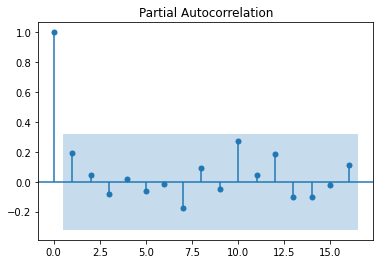

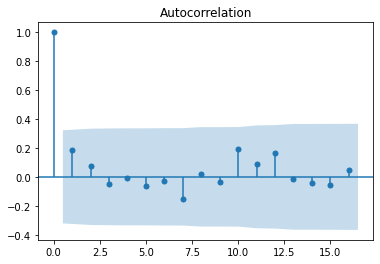

In [ ]:
plot_pacf(df.iloc[0]);
plot_acf(df.iloc[0]);

In [ ]:
#Augmented Dickey Fuller Test
ad_fuller_result = adfuller(df.iloc[0])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.007848407782114
p-value: 2.1412943043115563e-05


In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4

parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [ ]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 4, df.iloc[0])
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

(p,q)x(P,Q)         AIC
0    (0, 1, 0, 1)  246.657775
1    (0, 2, 0, 1)  246.886689
2    (1, 1, 0, 1)  247.023104
3    (0, 2, 0, 2)  248.089903
4    (0, 1, 0, 2)  248.120515
5    (0, 2, 3, 0)  248.320994
6    (0, 1, 1, 1)  248.328981
7    (0, 2, 1, 1)  248.360564
8    (1, 1, 0, 2)  248.436759
9    (1, 1, 3, 0)  248.560760
10   (0, 1, 3, 0)  248.603558
11   (1, 1, 1, 1)  248.629309
12   (2, 1, 0, 1)  248.862990
13   (0, 3, 0, 1)  248.884215
14   (1, 2, 0, 1)  248.884291
15   (1, 3, 0, 1)  249.154372
16   (0, 2, 1, 2)  249.224413
17   (0, 1, 0, 3)  249.368660
18   (0, 1, 1, 2)  249.410565
19   (0, 2, 0, 3)  249.474086
20   (0, 1, 2, 1)  249.645735
21   (1, 1, 0, 3)  249.845307
22   (3, 0, 0, 2)  249.849623
23   (2, 1, 0, 2)  249.920205
24   (2, 3, 0, 1)  249.950036
25   (0, 2, 2, 1)  249.968982
26   (0, 3, 0, 2)  250.038885
27   (1, 2, 0, 2)  250.055915
28   (0, 2, 2, 0)  250.186050
29   (1, 3, 0, 2)  250.225424
30   (1, 1, 2, 1)  250.227112
31   (2, 1, 1, 1)  250.269155
32   (2, 1, 3, 0)  250.270444
33   (0, 2, 3, 1)  250.317201
34   (0, 3, 3, 0)  250.317694
35   (1, 2, 3, 0)  250.318511
36   (0, 3, 1, 1)  250.337184
37   (1, 2, 1, 1)  250.343202
38   (1, 3, 1, 1)  250.391921
39   (2, 2, 0, 1)  250.467104
40   (0, 1, 3, 1)  250.494667
41   (1, 3, 3, 0)  250.558383
42   (1, 1, 3, 1)  250.560350
43   (3, 1, 0, 2)  250.640455
44   (1, 1, 1, 2)  250.761961
45   (1, 1, 2, 0)  250.781469
46   (3, 1, 0, 1)  250.820106
47   (0, 1, 2, 0)  250.926610
48   (0, 2, 2, 2)  251.035803
49   (0, 1, 2, 2)  251.068958
50   (0, 3, 1, 2)  251.100241
51   (0, 2, 1, 3)  251.115499
52   (1, 2, 1, 2)  251.144101
53   (0, 1, 1, 3)  251.186692
54   (3, 2, 0, 1)  251.215548
55   (2, 1, 0, 3)  251.254051
56   (2, 2, 0, 2)  251.323008
57   (2, 3, 0, 2)  251.366341
58   (0, 3, 0, 3)  251.374425
59   (1, 2, 0, 3)  251.407548
60   (2, 2, 1, 1)  251.416351
61   (1, 1, 2, 2)  251.466830
62   (0, 2, 1, 0)  251.507281
63   (1, 1, 1, 3)  251.558150
64   (2, 2, 3, 0)  251.695989
65   (2, 0, 0, 1)  251.723257
66   (2, 3, 1, 1)  251.783623
67   (3, 0, 0, 3)  251.793003
68   (3, 0, 1, 2)  251.807449
69   (3, 2, 0, 2)  251.814075
70   (2, 1, 2, 1)  251.844960
71   (1, 2, 2, 0)  251.881994
72   (0, 3, 2, 1)  251.919242
73   (0, 2, 3, 2)  251.928416
74   (0, 3, 2, 0)  251.930256
75   (1, 2, 2, 1)  251.933499
76   (2, 3, 3, 0)  251.934292
77   (1, 3, 0, 3)  252.071052
78   (1, 3, 1, 2)  252.100064
79   (2, 1, 2, 0)  252.149999
80   (3, 1, 0, 3)  252.169773
81   (1, 3, 2, 1)  252.182065
82   (3, 2, 1, 1)  252.193259
83   (1, 0, 0, 1)  252.238709
84   (1, 1, 1, 0)  252.257453
85   (3, 1, 1, 1)  252.261695
86   (3, 1, 3, 0)  252.269558
87   (2, 1, 3, 1)  252.270379
88   (1, 3, 3, 1)  252.271387
89   (0, 3, 3, 1)  252.313475
90   (1, 2, 3, 1)  252.314365
91   (0, 1, 3, 2)  252.384937
92   (1, 1, 3, 2)  252.393928
93   (2, 1, 1, 2)  252.548387
94   (3, 0, 0, 1)  252.584143
95   (3, 0, 1, 1)  252.592542
96   (3, 0, 3, 1)  252.637086
97   (3, 0, 3, 0)  252.766455
98   (3, 2, 3, 0)  252.769570
99   (2, 1, 2, 2)  252.832767
100  (0, 2, 2, 3)  252.871005
101  (0, 3, 2, 2)  252.908238
102  (2, 1, 1, 3)  252.914302
103  (1, 2, 2, 2)  252.946493
104  (3, 1, 1, 2)  252.956811
105  (0, 3, 1, 3)  252.987682
106  (2, 3, 0, 3)  253.000987
107  (1, 2, 1, 3)  253.027323
108  (2, 3, 2, 1)  253.038172
109  (2, 0, 0, 2)  253.041701
110  (1, 2, 1, 0)  253.079729
111  (2, 0, 3, 0)  253.093082
112  (2, 2, 0, 3)  253.116466
113  (2, 3, 1, 2)  253.134792
114  (2, 2, 1, 2)  253.148033
115  (0, 2, 3, 3)  253.160349
116  (2, 2, 2, 1)  253.212469
117  (2, 0, 1, 1)  253.221378
118  (0, 1, 2, 3)  253.237865
119  (0, 3, 1, 0)  253.309314
120  (1, 1, 2, 3)  253.420776
121  (3, 0, 2, 1)  253.503540
122  (0, 1, 3, 3)  253.519149
123  (2, 3, 3, 1)  253.529889
124  (3, 2, 1, 2)  253.554782
125  (2, 2, 3, 1)  253.569285
126  (3, 0, 1, 3)  253.596775
127  (3, 0, 2, 2)  253.599935
128  (1, 1, 3, 3)  253.637737
129  (3, 3, 3, 0)  253.716864
130  (3, 3, 0, 1)  253.722658
131  (0, 1, 1, 0)  253.727140
132  (2, 1, 3, 2

In [ ]:
best_model = SARIMAX(df.iloc[0], order=(0, 1, 2), seasonal_order=(0, 1, 2, 4)).fit(dis=-1)
print(best_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   37
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 4)   Log Likelihood                -119.045
Date:                           Mon, 07 Mar 2022   AIC                            248.090
Time:                                   16:35:53   BIC                            255.419
Sample:                                        0   HQIC                           250.519
                                            - 37                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7161    158.831     -0.005      0.996    -312.019     310.587
ma.L2         -0.2835     44.982     -0.006

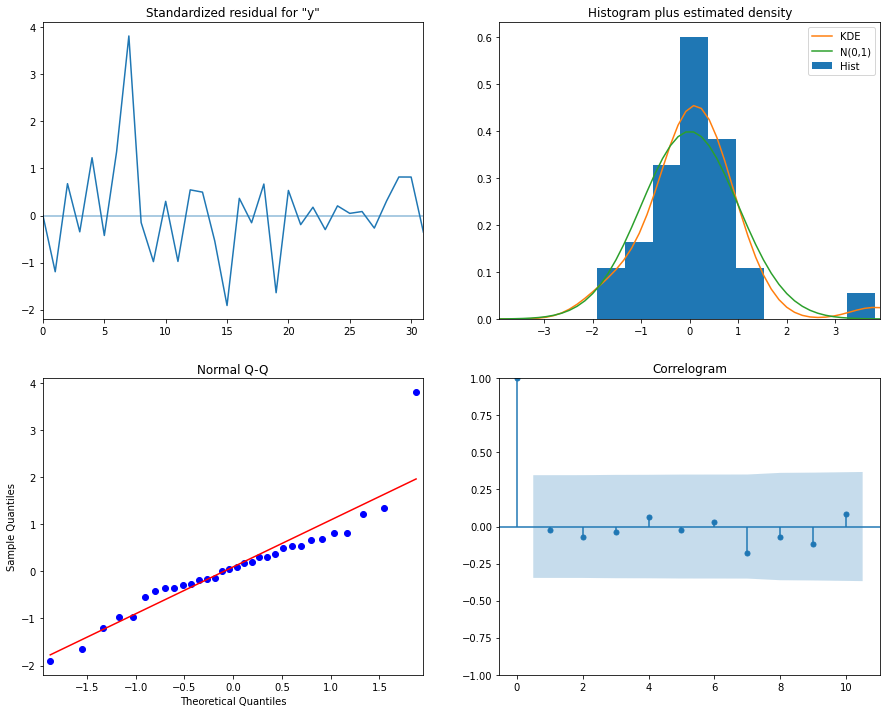

In [ ]:
best_model.plot_diagnostics(figsize=(15,12));

In [ ]:
train, val = df.iloc[:831], df.iloc[831:]

<AxesSubplot:>

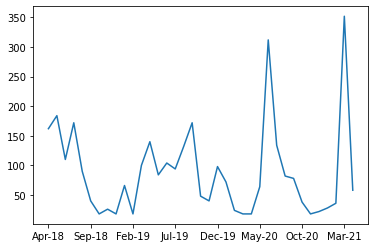

In [ ]:
df.iloc[3].plot()

In [ ]:
my_order = (1, 1, 1)
my_seasonal_order = (1,1,1,4)
model = SARIMAX(df.iloc[3], order = my_order, seasonal_order= my_seasonal_order)

In [ ]:
model_fit = model.fit()

In [ ]:
yhat = model_fit.forecast()

In [ ]:
yhat = model_fit.predict(start = len(df.iloc[3]), end = len(df.iloc[3]))

In [ ]:
yhat

37    75.378115
dtype: float64

LSTM

In [ ]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("Train_data.csv")
df.head()

Warehouse id Region SKU id  Apr-18  May-18  Jun-18  Jul-18  Aug-18  Sep-18  \
0         Wh-1  NORTH  SKU-1      27      13      30      14      22       8   
1         Wh-1  NORTH  SKU-2      88      28     127     130      58      10   
2         Wh-1  NORTH  SKU-3       6       6       6       6       6       6   
3         Wh-1  NORTH  SKU-4     162     184     110     172      90      40   
4         Wh-1  NORTH  SKU-5     171     402     627     615     300     417   

   Oct-18  ...  Aug-20  Sep-20  Oct-20  Nov-20  Dec-20  Jan-21  Feb-21  \
0       8  ...      12       8       8       8       8       8      14   
1       7  ...      16       7       7       7       7       7      13   
2       6  ...       8       6       6       6       6       6       6   
3      18  ...      82      78      38      18      22      28      36   
4     141  ...     468     216      75       6      30      66     141   

   Mar-21  Apr-21  May-21  
0      16       8      12  
1      43      13      43  
2       8      26       6  
3     352      58      18  
4     699     183      24  

[5 rows x 41 columns]

In [ ]:
df.columns = df.columns.str.replace('[-]', '', regex=True)
df.head()

Warehouse id Region SKU id  Apr18  May18  Jun18  Jul18  Aug18  Sep18  Oct18  \
0         Wh-1  NORTH  SKU-1     27     13     30     14     22      8      8   
1         Wh-1  NORTH  SKU-2     88     28    127    130     58     10      7   
2         Wh-1  NORTH  SKU-3      6      6      6      6      6      6      6   
3         Wh-1  NORTH  SKU-4    162    184    110    172     90     40     18   
4         Wh-1  NORTH  SKU-5    171    402    627    615    300    417    141   

   ...  Aug20  Sep20  Oct20  Nov20  Dec20  Jan21  Feb21  Mar21  Apr21  May21  
0  ...     12      8      8      8      8      8     14     16      8     12  
1  ...     16      7      7      7      7      7     13     43     13     43  
2  ...      8      6      6      6      6      6      6      8     26      6  
3  ...     82     78     38     18     22     28     36    352     58     18  
4  ...    468    216     75      6     30     66    141    699    183     24  

[5 rows x 41 columns]

After feature engineering we narrow down to below observations.  
The significant factors seem to be:   
1. Region  
2. April 2021 (most important)  
3. September 2020  
4. October 2020  
5. October 2019  

In [ ]:
# Univariate LSTM
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# define model
def fit_LSTM_model(X_train, y_train, epochs, neurons):
  model = Sequential()
  model.add(LSTM(neurons, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(X_train, y_train, epochs=epochs, verbose=0)
  return model

In [ ]:
from sklearn.metrics import *
def get_LSTM_accuracy(model, X, Y, n_steps, n_features):
  y_pred = []
  for i in range(len(X)):
    x = X[i].reshape((1, n_steps, n_features))
    y = model.predict(x, verbose=0)
    y_pred.append(y.copy()[0][0])

  print("Predicted: ", y_pred)
  print("Actual: ", Y)

  print("Mean absolute error =", round(mean_absolute_error(Y, y_pred), 2)) 
  print("Mean squared error =", round(mean_squared_error(Y, y_pred), 2)) 
  print("Median absolute error =", round(median_absolute_error(Y, y_pred), 2)) 
  print("Explain variance score =", round(explained_variance_score(Y, y_pred), 2)) 
  print("R2 score =", round(r2_score(Y, y_pred), 2))

  data_plot = pd.DataFrame({"Time": range(Y.shape[0]), "Predict": y_pred, "Actual": Y})
  sns.lineplot(x = "Time", y = "Actual", data=data_plot)
  sns.lineplot(x = "Time", y = "Predict", data=data_plot)
  plt.show()

In [ ]:
def train_LSTM_model(time_series, epochs, neurons, n_steps, n_features, percentage_train):
  X, y = split_sequence(time_series, n_steps)

  print("X: ", X.shape)
  print("Y: ", y.shape)

  X_train, y_train, X_test, y_test = X[0:int(percentage_train*X.shape[0])], y[0:int(percentage_train*X.shape[0])], X[int(percentage_train*X.shape[0]):], y[int(percentage_train*X.shape[0]):]
  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

  print("X_train: ", X_train.shape)
  print("y_train: ", y_train.shape)
  print("X_test: ", X_test.shape)
  print("y_test: ", y_test.shape)

  LSTM_model = fit_LSTM_model(X_train, y_train, epochs, neurons)

  return X_train, y_train, X_test, y_test, LSTM_model

In [ ]:
time_df = df.drop(['Warehouse id', 'Region', 'SKU id'], axis = 1)
time_pd_series = time_df.sum()
time_series = time_pd_series.to_numpy()

In [ ]:
n_steps = 1
n_features = 1
percentage_train = 0.8
epochs = 500
neurons = 50

In [ ]:
X_train, y_train, X_test, y_test, LSTM_model = train_LSTM_model(time_series, epochs, neurons, n_steps, n_features, percentage_train)

X:  (37, 1)
Y:  (37,)
X_train:  (29, 1, 1)
y_train:  (29,)
X_test:  (8, 1, 1)
y_test:  (8,)


Predicted:  [218377.34, 190846.81, 184095.06, 138818.52, 153930.75, 139531.8, 142344.34, 177608.45, 186628.88, 155974.9, 127799.69, 338478.88, 249960.64, 231044.7, 222523.28, 152261.02, 165633.22, 156003.7, 142344.34, 201114.2, 237542.33, 214722.75, 234728.11, 172650.12, 12733.586, 157907.25, 177837.2, 150986.9, 187776.77]
Actual:  [225281 217311 163865 181704 164707 168027 209654 220302 184117 150858
 399551 295061 272732 262673 179733 195518 184151 168027 237401 280402
 253465 277080 203801  15030 186398 209924 178229 221657 215886]
Mean absolute error = 51916.13
Mean squared error = 6057491719.08
Median absolute error = 31628.3
Explain variance score = -0.27
R2 score = -0.51


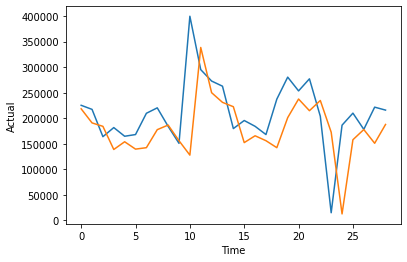

In [ ]:
get_LSTM_accuracy(LSTM_model, X_train, y_train, n_steps, n_features)

Predicted:  [182887.88, 210169.34, 227301.19, 341914.9, 241697.56, 242157.58, 341254.97, 132782.6]
Actual:  [248090 268313 403607 285307 285850 402828 156740 126886]
Mean absolute error = 93936.74
Mean squared error = 12970645268.91
Median absolute error = 61672.89
Explain variance score = -0.37
R2 score = -0.49


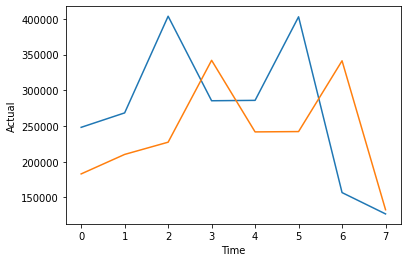

In [ ]:
get_LSTM_accuracy(LSTM_model, X_test, y_test, n_steps, n_features)

XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.model_selection import train_test_split

X = df_N.drop(["Region", "May-21"], axis=1)
y = df_N["May-21"]

X['SKU id'] = X['SKU id'].replace({'SKU-': ''}, regex=True)
X['Warehouse id'] = X['Warehouse id'].replace({'Wh-': ''}, regex=True)
#X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X1 = X[["Apr-21", "Sep-20", "Oct-20", "Oct-19"]]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42, shuffle=False)

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

y_pred = reg.predict(X_test)
#y_pred = pd.DataFrame(y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
#accuracy = accuracy_score(y_test[0], y_pred[0])

[17:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mape

1.0628820328144617

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.model_selection import train_test_split

X = df_E.drop(["Region", "May-21"], axis=1)
y = df_E["May-21"]

X['SKU id'] = X['SKU id'].replace({'SKU-': ''}, regex=True)
X['Warehouse id'] = X['Warehouse id'].replace({'Wh-': ''}, regex=True)
#X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X1 = X[["Apr-21", "Sep-20", "Oct-20", "Oct-19"]]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42, shuffle=False)

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

y_pred = reg.predict(X_test)
#y_pred = pd.DataFrame(y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
#accuracy = accuracy_score(y_test[0], y_pred[0])
mape

[19:16:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1.4741803278976697

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.model_selection import train_test_split

X = df_W.drop(["Region", "May-21"], axis=1)
y = df_W["May-21"]

X['SKU id'] = X['SKU id'].replace({'SKU-': ''}, regex=True)
X['Warehouse id'] = X['Warehouse id'].replace({'Wh-': ''}, regex=True)
#X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X1 = X[["Apr-21", "Sep-20", "Oct-20", "Oct-19"]]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42, shuffle=False)

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

y_pred = reg.predict(X_test)
#y_pred = pd.DataFrame(y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
#accuracy = accuracy_score(y_test[0], y_pred[0])
mape

[19:17:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3.1985850844609605

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.model_selection import train_test_split

X = df_S.drop(["Region", "May-21"], axis=1)
y = df_S["May-21"]

X['SKU id'] = X['SKU id'].replace({'SKU-': ''}, regex=True)
X['Warehouse id'] = X['Warehouse id'].replace({'Wh-': ''}, regex=True)
#X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X1 = X[["Apr-21", "Sep-20", "Oct-20", "Oct-19"]]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42, shuffle=False)

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

y_pred = reg.predict(X_test)
#y_pred = pd.DataFrame(y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
#accuracy = accuracy_score(y_test[0], y_pred[0])
mape

[19:17:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1.5115086853028588

ARIMA - not working at the moment, doing it on R and will complete it by night.

Please check Marisha's notebook, it has a number of plots - https://colab.research.google.com/drive/17gBVQ2T4Zt7ZI1nyz2MDW2SreK8EStqn?usp=sharing